In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/Colab_Notebook/Music_Genre_Classification"
os.chdir(Root)

[Dataset](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification)

In [ ]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
audio_dataset_path='/content/drive/MyDrive/Colab_Notebook/Music_Genre_Classification/Data/genres_original'
metadata=pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Music_Genre_Classification/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
# metadata.drop(labels=552, axis=0, inplace=True)

In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))    
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

554it [09:05,  1.03s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
555it [09:08,  1.47s/it]

Error: 


1000it [15:59,  1.04it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.57065, 121.57179, -19.168142, 42.36642, ...",blues
1,"[-207.5017, 123.991264, 8.955127, 35.87765, 2....",blues
2,"[-90.722595, 140.4463, -29.09389, 31.684334, -...",blues
3,"[-199.5442, 150.09091, 5.6626782, 26.85908, 1....",blues
4,"[-160.3377, 126.219635, -35.58781, 22.148071, ...",blues


In [ ]:
extracted_features_df['class'].value_counts()

rock         100
disco        100
hiphop       100
classical    100
country      100
metal        100
blues        100
pop          100
reggae       100
jazz          99
Name: class, dtype: int64

**Split the dataset into independent and dependent dataset**

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(999, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y.shape

(999, 10)

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[ 2.67117920e+01,  7.97894287e+01, -5.20517769e+01, ...,
        -1.43984926e+00, -1.27259743e+00, -5.90781355e+00],
       [-1.44929214e+02,  1.18459854e+02,  2.05253220e+01, ...,
         1.89384019e+00, -1.88978815e+00, -1.85136843e+00],
       [-6.60630646e+01,  9.78820724e+01, -1.88321342e+01, ...,
        -1.23837304e+00, -6.33012116e-01, -1.33665276e+00],
       ...,
       [-7.74571762e+01,  1.30936478e+02, -2.33290615e+01, ...,
        -4.20865250e+00, -3.52202845e+00,  2.60719037e+00],
       [-1.90423065e+02,  1.29542053e+02, -7.84552956e+00, ...,
        -2.24016356e+00, -3.98439646e+00, -1.98053861e+00],
       [-4.65721245e+01,  8.68102798e+01, -3.47887421e+01, ...,
         1.48847297e-01,  9.24574316e-01, -8.69751930e-01]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 40)
(200, 40)
(799, 10)
(200, 10)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
y.shape[1]

10

In [ ]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
22/25 [=========================>....] - ETA: 0s - loss: 4.7540 - accuracy: 0.1023
Epoch 00001: val_loss improved from inf to 2.29090, saving model to saved_models/audio_classification_02:17:40.hdf5
25/25 [==============================] - 2s 26ms/step - loss: 4.5624 - accuracy: 0.1014 - val_loss: 2.2909 - val_accuracy: 0.1500
Epoch 2/100
22/25 [=========================>....] - ETA: 0s - loss: 2.6823 - accuracy: 0.1136
Epoch 00002: val_loss improved from 2.29090 to 2.28803, saving model to saved_models/audio_classification_02:17:40.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 2.6594 - accuracy: 0.1164 - val_loss: 2.2880 - val_accuracy: 0.2000
Epoch 3/100
23/25 [==========================>...] - ETA: 0s - loss: 2.4122 - accuracy: 0.1073
Epoch 00003: val_loss improved from 2.28803 to 2.26733, saving model to saved_models/audio_classification_02:17:40.hdf5
25/25 [==============================] - 0s 17ms/step - loss: 2.3949 - accuracy: 0.1139 - val_loss:

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

[1.5365269184112549, 0.6499999761581421]

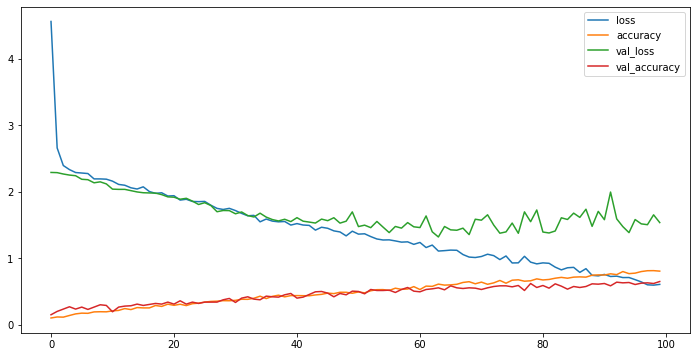

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [ ]:
#model.predict_class(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([7, 9, 0, 6, 9, 5, 3, 4, 0, 9, 6, 2, 4, 8, 9, 9, 3, 3, 3, 2, 9, 4,
       5, 2, 1, 2, 0, 9, 4, 3, 6, 3, 7, 4, 7, 7, 0, 4, 5, 3, 9, 8, 6, 0,
       2, 8, 7, 9, 3, 8, 3, 9, 3, 1, 8, 4, 4, 2, 8, 5, 8, 6, 1, 9, 7, 8,
       5, 8, 9, 6, 1, 4, 1, 3, 9, 4, 6, 4, 6, 2, 6, 2, 6, 5, 3, 3, 5, 9,
       2, 7, 3, 8, 8, 5, 2, 6, 3, 4, 5, 0, 1, 5, 6, 6, 7, 5, 1, 2, 5, 8,
       8, 1, 8, 8, 2, 0, 7, 3, 9, 5, 0, 4, 8, 6, 2, 2, 2, 4, 6, 3, 7, 4,
       7, 3, 9, 0, 4, 1, 7, 2, 7, 5, 6, 9, 4, 0, 0, 1, 0, 5, 3, 9, 7, 8,
       5, 4, 4, 3, 6, 4, 1, 5, 1, 5, 7, 3, 3, 7, 1, 5, 2, 8, 3, 3, 6, 1,
       7, 4, 5, 4, 2, 3, 3, 9, 3, 2, 6, 4, 8, 0, 4, 6, 7, 8, 6, 1, 2, 5,
       3, 4])

In [ ]:
filename="/content/drive/MyDrive/Colab_Notebook/Music_Genre_Classification/audio/hiphop.00006.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predictClass= np.argmax(predicted_label,axis=1)
print(predictClass)
#reshape_predicted = predicted_label.reshape((1,-1))
#print(reshape_predicted)

[-59.578934    63.90921      3.4584134   45.270702    -1.1458602
  28.271238   -13.187001    23.603943    -6.63226     16.484814
  -7.269998    14.494327    -5.7989316    8.181651    -6.8575335
   6.7396636   -4.4808335    0.95436347  -7.1289334   -1.2653025
  -3.600657     1.3596973   -0.11735395   4.6475053   -0.2599131
   1.6817611   -0.80166984  -2.1436808    2.8634982   -1.2061265
  -1.5157734   -3.6283112   -1.336045    -1.5045173   -0.2594879
  -3.9020126   -1.2160751   -2.8634448   -1.6510885   -3.9587872 ]
[-59.578934    63.90921      3.4584134   45.270702    -1.1458602
  28.271238   -13.187001    23.603943    -6.63226     16.484814
  -7.269998    14.494327    -5.7989316    8.181651    -6.8575335
   6.7396636   -4.4808335    0.95436347  -7.1289334   -1.2653025
  -3.600657     1.3596973   -0.11735395   4.6475053   -0.2599131
   1.6817611   -0.80166984  -2.1436808    2.8634982   -1.2061265
  -1.5157734   -3.6283112   -1.336045    -1.5045173   -0.2594879
  -3.9020126   -1.2160751

In [ ]:
prediction_class =labelencoder.inverse_transform(predictClass) 
prediction_class

array(['hiphop'], dtype='<U9')